# ABD Vizesi Tahmin Projesi
* Makine Öğrenimi Projesi Yaşam Döngüsü
	1.	Problemin Anlaşılması
	2.	Veri Toplama
	3.	Keşifsel Veri Analizi (EDA)
	4.	Veri Temizleme
	5.	Veri Ön İşleme
	6.	Model Eğitimi
	7.	En İyi Modelin Seçimi

# Hakkında

Amerika Birleşik Devletleri Göçmenlik ve Vatandaşlık Yasası (INA), yabancı işçilerin Amerika’ya geçici ya da kalıcı olarak çalışma izni almasına olanak tanır. Bu yasa, Amerika’daki işçileri iş yerinde olumsuz etkilerden korumayı ve yabancı işçilerin istihdam edilmesiyle ilgili gereklilikleri düzenler. Yabancı işçilerin Amerika’da çalışmasıyla ilgili göçmenlik programları, Yabancı Çalışan Sertifikası Ofisi (OFLC) tarafından yönetilmektedir.

* 1) Problem Tanımı

OFLC, yabancı işçileri Amerika Birleşik Devletleri’ne getirmek isteyen işverenler için iş sertifikası başvuruları alır ve bu başvurulara sertifika verir. Geçtiğimiz yıl başvuran kişi sayısı oldukça fazla olduğundan, OFLC, vize başvuru sahiplerini önceki verilere dayalı olarak sıralamak için makine öğrenimi modellerine ihtiyaç duymaktadır.
Bu projede, verilen veri setini kullanarak bir sınıflandırma modeli oluşturacağız.

Bu model, başvuru sahiplerinin vizesinin onaylanıp onaylanmayacağını tahmin edecektir.
Ayrıca, başvuru sahipleri için vize verilip verilmeyeceğini etkileyen belirli kriterlere dayalı olarak, vize onaylanacak veya reddedilecek başvurular için uygun profilleri öneren bir sistem kuracağız.

* 2) Veri Toplama

Veri, Yabancı Çalışan Sertifikası Ofisi (OFLC) tarafından sağlanmaktadır.
Veri seti, 25.480 satır ve 12 sütun içermektedir.
Bu veri setine şu linkten ulaşabilirsiniz: Kaggle Veri Seti

2.1 Veri ve Gerekli Paketlerin İçe Aktarılması

Projenin başlangıcında, veriyi ve gerekli kütüphaneleri içe aktaracağız. Pandas, Numpy, Matplotlib, Seaborn ve Warnings gibi kütüphaneleri kullanarak veri analizini gerçekleştireceğiz.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("EasyVisa.csv")
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [4]:
df.shape

(25480, 12)

# Check Datatypes in the dataset 
(Veri setindeki veri türlerini kontrol edelim)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


# EXPLORING DATA
(VERİ KEŞFİ)

In [6]:
numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

print('Toplam {} sayısal özellik var: {}'.format(len(numeric_features), numeric_features))
print('\nToplam {} kategorik özellik var: {}'.format(len(categorical_features), categorical_features))

Toplam 3 sayısal özellik var: ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

Toplam 9 kategorik özellik var: ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [7]:
# her kategorik sütunun değerlerinin dağılımını, her bir kategorinin toplam içindeki yüzdelik oranını hesaplayarak yazdırır.
for col in categorical_features:
    print(df[col].value_counts(normalize=True)*100)
    print('-----------------------------------')

case_id
EZYV25480    0.003925
EZYV01       0.003925
EZYV02       0.003925
EZYV03       0.003925
EZYV04       0.003925
               ...   
EZYV13       0.003925
EZYV12       0.003925
EZYV11       0.003925
EZYV10       0.003925
EZYV09       0.003925
Name: proportion, Length: 25480, dtype: float64
-----------------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
-----------------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
-----------------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
-----------------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
-------------------------------

# İçgörüler
	•	case_id her sütun için benzersiz değerlere sahiptir, bu nedenle önemsiz olduğundan düşürülebilir.
	•	continent sütunu Asya’ya çok fazla eğilim göstermektedir. Bu yüzden diğer kategoriler birleştirilerek tek bir kategori oluşturulabilir.
	•	unit_of_wage önemli bir sütun gibi görünüyor çünkü çoğu yıllık sözleşmelerdir.

# Tek Değişkenli Analiz

Tek değişkenli analiz, bir değişkenin analizi anlamına gelir. “Uni” öneki “bir” anlamına gelir. Tek değişkenli analiz, tek bir değişkenin değerlerinin dağılımını anlamayı amaçlar.

Diğer Analiz Türleri:
	•	Çift Değişkenli Analiz: İki değişkenin analizi.
	•	Çok Değişkenli Analiz: İki veya daha fazla değişkenin analizi.

# Numerical Features

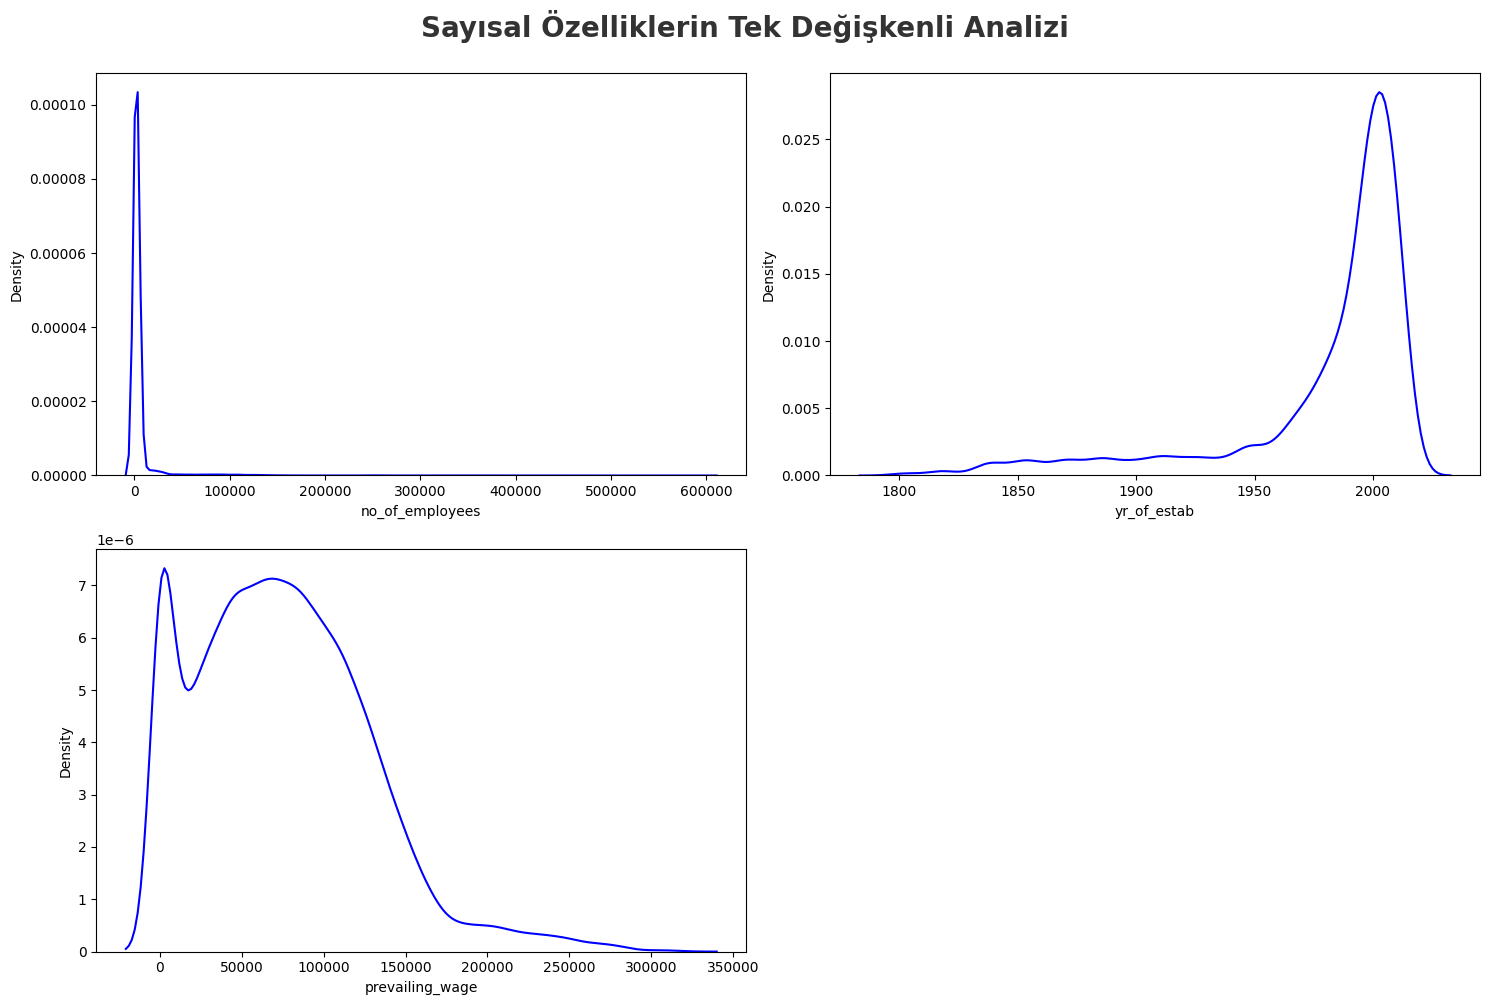

In [8]:
# Grafik boyutunu ayarlıyoruz
plt.figure(figsize=(15,10)) 

# Başlık ayarlarını yapıyoruz
plt.suptitle('Sayısal Özelliklerin Tek Değişkenli Analizi', fontsize=20, fontweight='bold', alpha=0.8, y=1) 

# Sayısal özellikler üzerinde döngü başlatıyoruz
for i in range (0, len(numeric_features)): 
    # Alt grafiklerde her bir özellik için ayrı grafik oluşturuyoruz
    plt.subplot(2, 2, i+1) 
    # KDE (Kernel Density Estimation) ile her bir sayısal özellik için dağılım grafiği çiziyoruz
    sns.kdeplot(x=df[numeric_features[i]], color='blue') 
    # Grafiğe x ekseni adı olarak sayısal özelliği ekliyoruz
    plt.xlabel(numeric_features[i]) 
    # Grafiğin düzeninin bozulmaması için tight_layout kullanıyoruz
    plt.tight_layout() 

* no_of_employees sütunu daha fazla çarpıklığa sahip gibi görünüyor, ancak bu durum aykırı değerlerden kaynaklanıyor olabilir.
	* yr_of_estab (kuruluş yılı) bir ayrık özelliktir.
	* privailing-wage (geçerli ücret) sağa çarpık bir dağılıma sahiptir.

# Categorical Features

In [ ]:

plt.figure(figsize=(15,8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1)

for i in range(0,len(categorical_features)):
    plt.subplot(3,3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

## İçgörüler
	•	requires_job_training, unit_of_wage, full_time_position ve continent sütunlarında tek bir kategori baskın.
	•	Diğer sütunlar dengeli bir dağılıma sahip.

## Çok Değişkenli Analiz

Çok değişkenli analiz, birden fazla değişkenin analizidir.

In [ ]:
discrete_features = [feature for feature in numeric_features if len(df[feature].unique())<=25]
continuous_features = [feature for feature in numeric_features if len(df[feature].unique())>25]

print('Toplam {} kesikli özellik bulunmaktadır: {}'.format(len(discrete_features), discrete_features))
print('\nToplam {} sürekli özellik bulunmaktadır: {}'.format(len(continuous_features), continuous_features))